In [6]:
%pylab inline
n=36;m=18;a=1.05
J=169
import numpy as np
import csv
data_root='../../BOSS DR12 Data/v3/'#'../../BOSS DR12 Data/'
file_root_jack=data_root+'CovMatricesJack/'#'../GoslingSphere/Jack/'#CovMatricesJack/'#_good/'
file_root_all=data_root+'CovMatricesAll/'#_good/'../GoslingSphere/All/'
rr_true_file =data_root+'weight_files/binned_pair_counts_n%d_m%d_j%d.dat'%(n,m,J)
weights_file = data_root+'weight_files/jackknife_weights_n%d_m%d_j%d.dat'%(n,m,J)

Populating the interactive namespace from numpy and matplotlib


### Using $4\times10^9$ pairs, $1\times10^{10}$ triples and $7\times10^{10}$ quads. 

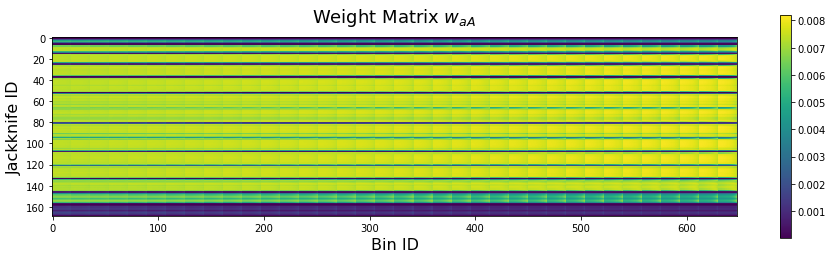

In [34]:
weights=np.loadtxt(weights_file)[:,1:]
plt.matshow(weights);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.gca().xaxis.tick_bottom()
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title(r'Weight Matrix $w_{aA}$',fontsize=FS+2);

In [35]:
def read_RR_all(n,m,file_root,a,string='full'):
    rrfile=file_root+'RR_n%d_m%d_%s.txt' %(n,m,string)
    rr_est = np.loadtxt(rrfile)
    rr_true = np.loadtxt(rr_true_file)
    return rr_est, rr_true

In [231]:
def read_cj_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2j_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3j_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4j_n%d_m%d_%s.txt' %(n,m,string)
    cxfile=file_root+'cxj_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4errj_n%d_m%d_%s.txt' %(n,m,string)
    errcxfile=file_root+'cxerrj_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))
    c3=np.loadtxt(c3file)
    c4=np.loadtxt(c4file)
    cx=np.loadtxt(cxfile)
    errc4=np.loadtxt(errc4file)
    c_tot=c4+a**2.*c2+a*c3+cx
    return c2,c3,c4,cx,errc4,c_tot

def read_c_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4err_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))
    c3=np.loadtxt(c3file)
    c4=np.loadtxt(c4file)
    errc4=np.loadtxt(errc4file)
    c_tot=c4+a**2.*c2+a*c3
    return c2,c3,c4,errc4,c_tot

In [37]:
c2j,c3j,c4j,cxj,c4jerr,cj_tot=read_cj_all(n,m,file_root_jack,a)
c2,c3,c4,c4err,c_tot=read_c_all(n,m,file_root_all,a)

In [38]:
binct4=np.loadtxt(file_root_all+'binct_c4_n%d_m%d_full.txt'%(n,m))
binct2=np.loadtxt(file_root_all+'binct_c2_n%d_m%d_full.txt'%(n,m))

Text(0.5,1,'Bin Count for Elements of $C_2$ matrix')

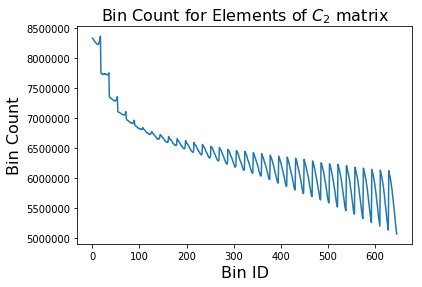

In [39]:
plt.plot(binct2);
plt.ylabel('Bin Count',fontsize=FS);
plt.xlabel('Bin ID',fontsize=FS)
plt.title(r'Bin Count for Elements of $C_2$ matrix',fontsize=FS)

Text(0.5,1,'Bin Count for Diagonal Elements of $C_4$ matrix')

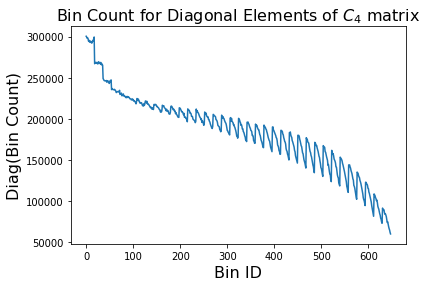

In [40]:
plt.plot(np.diag(binct4));
plt.ylabel('Diag(Bin Count)',fontsize=FS);
plt.xlabel('Bin ID',fontsize=FS)
plt.title(r'Bin Count for Diagonal Elements of $C_4$ matrix',fontsize=FS)

### Bin Count for $C_{4,ab}$ Matrix 

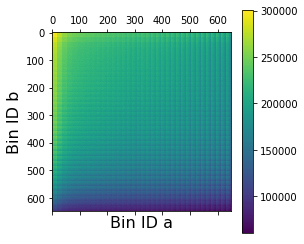

In [41]:
plt.matshow(binct4)
plt.ylabel('Bin ID b',fontsize=FS);
plt.xlabel('Bin ID a',fontsize=FS)
plt.colorbar()

In [42]:
rr_est,rr_true=read_RR_all(n,m,file_root_all,a)

# Total Matrices

### $C^J_{x,ab}$ plot

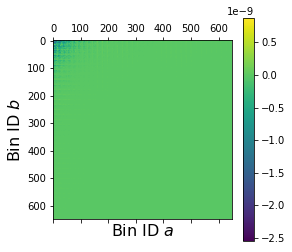

In [43]:
mat=cxj#c4j-cxj+c2j+c3j#_tot#c4j-cxj#_tot#c3ji#_tot
plt.matshow(mat,vmax=np.percentile(mat.ravel(),100),vmin=np.percentile(mat.ravel(),0))
#plt.xlim([0,40]);plt.ylim([0,40])
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS)
plt.colorbar()

### $C_{\mathrm{tot},ab}$ plot

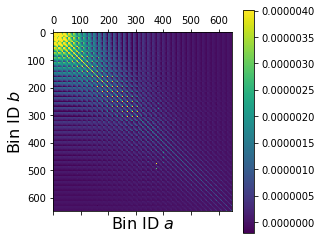

In [44]:
mat=c_tot
plt.matshow(mat,vmax=np.percentile(mat.ravel(),99.5),vmin=np.percentile(mat.ravel(),0.5))
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS)
plt.colorbar()

### Construct Eigenspectrum

**NB: Assume close to symmetric here to get real eigenvalues:**

In [219]:
eigval,eigvec=np.linalg.eigh(c_tot)

In [220]:
eigval[:-30]=0

In [221]:
diag_mat=np.diag(eigval)
s_mat=np.vstack(eigvec)
recon_mat=np.matmul(s_mat,np.matmul(diag_mat,np.linalg.inv(s_mat)))

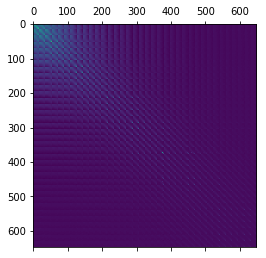

In [222]:
plt.matshow(recon_mat)

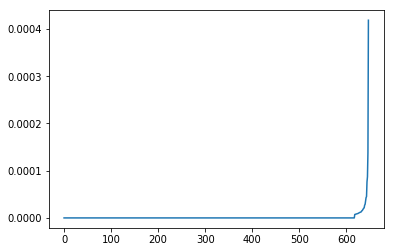

In [223]:
plt.plot(eigval)

### Compute $C_{ab}r_ar_b$:

In [224]:
r_bins = np.loadtxt('../python/binfile_linear.csv')

In [225]:
white_mat=np.zeros_like(c_tot)
for a in range(len(c_tot)):
    r_a = (r_bins[a/m][0]+r_bins[a/m][1])/2.
    for b in range(len(c_tot)):
        r_b = (r_bins[b/m][0]+r_bins[b/m][1])/2.
        white_mat[a,b]=c_tot[a,b]*r_a*r_b

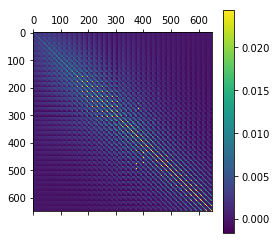

In [226]:
plt.matshow(white_mat,vmax=np.percentile(white_mat,99.9),vmin=np.percentile(white_mat,0.1));
plt.colorbar();

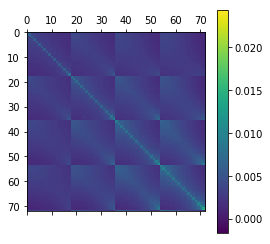

In [227]:
plt.matshow(white_mat,vmax=np.percentile(white_mat,99.9),vmin=np.percentile(white_mat,0.1));
plt.colorbar()
plt.ylim([72,0])
plt.xlim([0,72]);

### Compute reduced matrix:

In [228]:
red_mat=np.zeros_like(c_tot)
for a in range(len(c_tot)):
    for b in range(len(c_tot)):
        red_mat[a,b]=c_tot[a,b]/np.sqrt(c_tot[a,a]*c_tot[b,b])

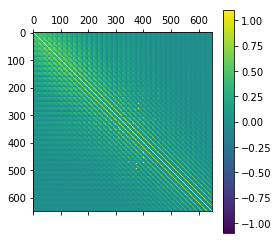

In [229]:
plt.matshow(red_mat,vmax=1.1,vmin=-1.1)
plt.colorbar();

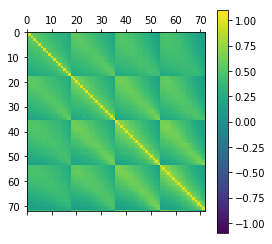

In [101]:
plt.matshow(red_mat,vmax=1.1,vmin=-1.1)
plt.colorbar();
plt.ylim([72,0])
plt.xlim([0,72]);

### Inverse of $C_{\mathrm{tot},ab}$

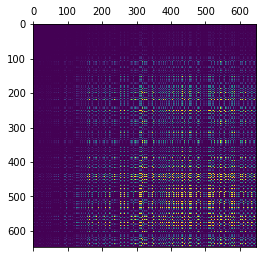

In [69]:
prec=np.linalg.inv(c_tot)
plt.matshow(prec,vmax=np.percentile(prec.ravel(),99),vmin=np.percentile(mat.ravel(),1))

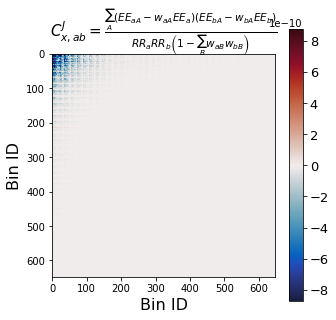

In [45]:
diff_mat=cxj
import cmocean
fig,ax=plt.subplots(1,figsize=(5,5))
vmax=max(diff_mat.ravel())
cax=ax.matshow(diff_mat,cmap=cmocean.cm.balance,vmax=vmax,vmin=-vmax);FS=16;
plt.gca().xaxis.tick_bottom()
ax.set_ylabel('Bin ID',fontsize=FS)
ax.set_xlabel('Bin ID',fontsize=FS)
cbar=fig.colorbar(cax);
cbar.ax.tick_params(labelsize=FS-3)
plt.title(r'$C^J_{x,ab}=\frac{\sum_A(EE_{aA}-w_{aA}EE_a)(EE_{bA}-w_{bA}EE_b)}{RR_aRR_b\left(1-\sum_B{w_{aB}w_{bB}}\right)}$',fontsize=FS-1);

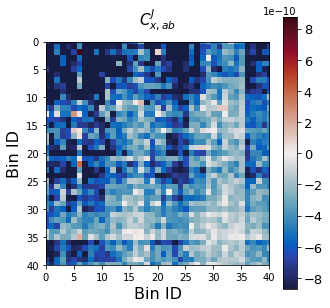

In [46]:
diff_mat=cxj
import cmocean
fig,ax=plt.subplots(1,figsize=(5,5))
vmax=max(diff_mat.ravel())
cax=ax.matshow(diff_mat,cmap=cmocean.cm.balance,vmax=vmax,vmin=-vmax);FS=16;
plt.gca().xaxis.tick_bottom()
plt.ylim([40,0])
plt.xlim([0,40])
ax.set_ylabel('Bin ID',fontsize=FS)
ax.set_xlabel('Bin ID',fontsize=FS)
cbar=fig.colorbar(cax);
cbar.ax.tick_params(labelsize=FS-3)
plt.title(r'$C^J_{x,ab}$',fontsize=FS-1);

### Precision Matrix

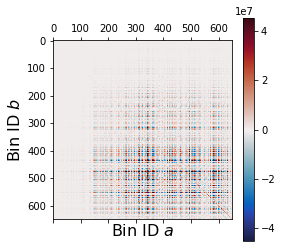

In [47]:
precision=np.linalg.inv(cj_tot)
import cmocean
cmap=cmocean.cm.balance
vmax=np.percentile(precision.ravel(),99.95)
plt.matshow(precision,vmax=vmax,vmin=-vmax,cmap=cmap)
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS)

plt.colorbar(cmap=cmap)

## Small Region of $C_4$ matrix

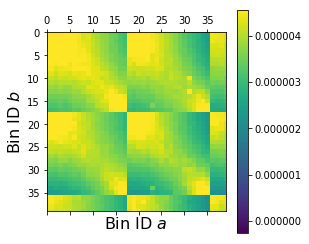

In [48]:
[vmax,vmin]=np.percentile(c4.ravel(),[99.95,0.05])
plt.matshow(c4,vmax=vmax,vmin=vmin)
plt.colorbar()
plt.xlim([0,39]);plt.ylim([39,0]);
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS);


## $C_2$ visualization

In [49]:
R_par=np.zeros(len(c2));
R_per=np.zeros(len(c2));
for i in range(len(c2)):
    rbin=50+i//m*(150.)/n+2.5
    mubin=(i%m)/float(m)+1/(2.*float(m))
    R_par[i]=rbin*mubin
    R_per[i]=rbin*np.sqrt(1.-mubin**2.)
RPAR,RPER=np.meshgrid(R_par,R_per)

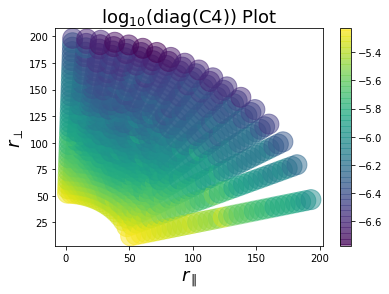

In [64]:
plt.scatter(R_par,R_per,c=np.log10(np.diag(c4)),s=400,alpha=0.5); FS=18
plt.colorbar()
plt.title(r'$\log_{10}(\mathrm{diag}$(C4)) Plot',fontsize=FS);plt.ylabel(r'$r_\perp$',fontsize=FS);plt.xlabel(r'$r_\parallel$',fontsize=FS);FS=16

# Diagonal Elements

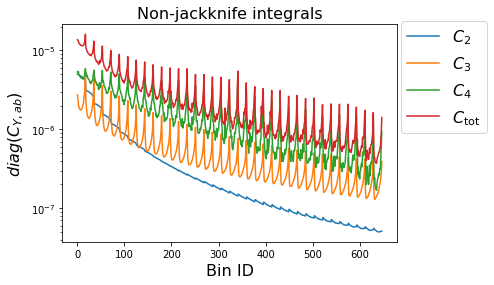

In [65]:
plt.plot(np.diag(c2),label=r'$C_2$')
plt.plot(np.diag(c3),label=r'$C_3$')
plt.plot(np.diag(c4),label=r'$C_4$')
plt.plot(np.diag(a**2.*c2+a*c3+c4),label=r'$C_\mathrm{tot}$')
plt.yscale('log'); FS=16
plt.xlabel('Bin ID',fontsize=FS)
plt.ylabel(r'$diag(C_{Y,ab})$',fontsize=FS);
plt.title('Non-jackknife integrals',fontsize=FS)
plt.legend(fontsize=FS,loc=9,bbox_to_anchor=(1.14,1.05));

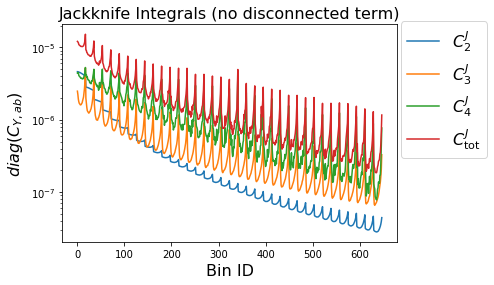

In [52]:
plt.plot(np.diag(c2j),label=r'$C_2^J$')
plt.plot(np.diag(c3j),label=r'$C_3^J$')
plt.plot(np.diag(c4j),label=r'$C_4^J$')
plt.plot(np.diag(c2j*a**2.+c3j*a+c4j+cxj),label=r'$C^J_\mathrm{tot}$')
#plt.plot(np.diag(cxj),label=r'$C_x^J$')
plt.legend(fontsize=FS,ncol=1,loc=9,bbox_to_anchor=(1.14,1.05));

plt.ylabel(r'$diag(C_{Y,ab})$',fontsize=FS);plt.xlabel('Bin ID',fontsize=FS)
plt.title('Jackknife Integrals (no disconnected term)',fontsize=FS);
plt.yscale('log');

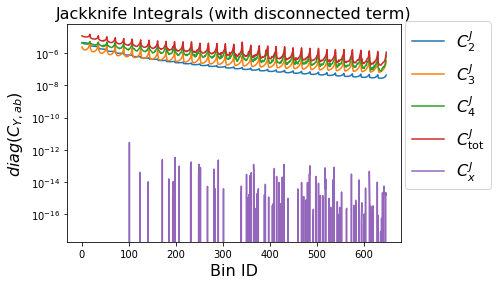

In [53]:
plt.plot(np.diag(c2j),label=r'$C_2^J$')
plt.plot(np.diag(c3j),label=r'$C_3^J$')
plt.plot(np.diag(c4j),label=r'$C_4^J$')
plt.plot(np.diag(c2j*a**2.+c3j*a+c4j+cxj),label=r'$C^J_\mathrm{tot}$')
plt.plot(np.diag(cxj),label=r'$C_x^J$')
plt.legend(fontsize=FS,ncol=1,loc=9,bbox_to_anchor=(1.14,1.05));

plt.ylabel(r'$diag(C_{Y,ab})$',fontsize=FS);plt.xlabel('Bin ID',fontsize=FS)
plt.title('Jackknife Integrals (with disconnected term)',fontsize=FS);
plt.yscale('log');

## $RR_a$ Comparison

In [54]:
R1=50.;R2=200.;
vol = np.pi*4./3.*(R2**3.-R1**3.)
N_particles = 1e6
n_density = N_particles/vol

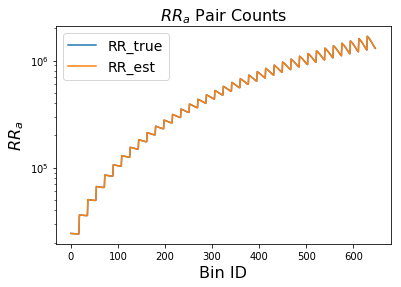

In [55]:
plt.plot(rr_true,label='RR_true')
plt.plot(rr_est,label='RR_est')
plt.yscale('log'); FS=16
plt.xlabel('Bin ID',fontsize=FS)
plt.ylabel(r'$RR_{a}$',fontsize=FS)
plt.legend(fontsize=FS-2);plt.title('$RR_a$ Pair Counts',fontsize=FS);

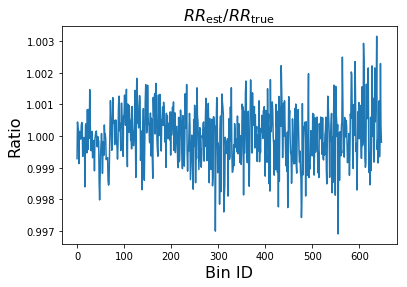

In [56]:
plt.plot((rr_est/rr_true))
plt.title('$RR_\mathrm{est}/RR_\mathrm{true}$',fontsize=FS)
plt.ylabel('Ratio',fontsize=FS);plt.xlabel('Bin ID',fontsize=FS);

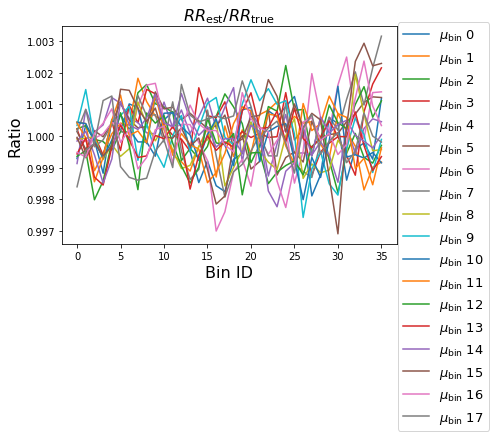

In [57]:
ratio_mu=np.zeros([m,len(rr_true)/m])
for i in range(len(rr_true)):
    ratio_mu[i%m,i/m]=rr_est[i]/rr_true[i]
for i in range(m):
    plt.plot(ratio_mu[i,:],label=r'$\mu_\mathrm{bin}$ %d' %i)
plt.legend(loc=9,bbox_to_anchor=(1.14,1.05),fontsize=FS-3)
plt.title('$RR_\mathrm{est}/RR_\mathrm{true}$',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS);plt.ylabel('Ratio',fontsize=FS);

## Computing KL Divergences

In [33]:
cj_all = c2j+c3j+c4j+cxj
cj_no_c2 = c3j+c4j+cxj
cj_no_cx = c2j+c3j+c4j
cj_no_c3 = c2j+c4j+cxj
cj_no_c4 = c2j+c3j+cxj
precision_all = np.linalg.inv(cj_all)

def KL_div(precision_a,covariance_b):
    """Return negative log likelihood of the KL divergence (in first form)
    i.e. KL = Trace(precision*covariance) - log(det(precision)) - log(det(covariance)) - N_bins"""
    product = np.matmul(precision_a,covariance_b);
    N_bins=len(precision_a)
    logdetPrec = np.linalg.slogdet(precision_a)
    logdetCov = np.linalg.slogdet(covariance_b)
    if logdetPrec[0]!=1.:
        raise Exception('Undefined determinant')
    if logdetCov[0]!=1.:
        raise Exception('Undefined determinant')
    KL = np.matrix.trace(product) - logdetPrec[1] - logdetCov[1] - N_bins
    return KL
    

KL_2 = KL_div(precision_all,cj_no_c2)
KL_3 = KL_div(precision_all,cj_no_c3)
KL_x = KL_div(precision_all,cj_no_cx)

print('Removing C_x^J: %.2f\nRemoving C_2^J: %.2f\nRemoving C_3^J: %.2f'%(KL_x,KL_2,KL_3))

Exception: Undefined determinant